In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import yfinance as yf

Needed Installs:
* yfinance
* [plotly orca](https://plotly.com/python/static-image-export/)

Important Links:

* [yfinance repo](https://github.com/ranaroussi/yfinance)
* [DASH medium sample blog](https://medium.com/plotly/introducing-dash-5ecf7191b503)

In [2]:
msft = yf.Ticker("MSFT")
#msft.info
#print(dir(msft))

---

Notes

* Add intervals that adapt to period
* Added links and installs section
* Renamed plot-chart to stock-chart

* Exact option prices might slightly be different based on round() methods
* Added option to get options table
* TO DO: Add caption to table specifying what it is
* TO DO: Option to add interactive plotly table

---

In [72]:
def options_table(stock_object, date=None, kind='calls'):
    
    possible_dates = stock_object.options
    if date is None:
        date = possible_dates[0]
    if date not in possible_dates:
        raise KeyError('Invalid date selected. For available dates, try ticker_object.options')
        
    op_data = stock_object.option_chain(date=date)
    
    if kind == 'calls':
        data = stock_object.option_chain(date=date).calls
        data = data[['strike', 
                     'lastPrice', 
                     'bid', 
                     'ask',
                     'change', 
                     'percentChange', 
                     'volume', 
                     'openInterest',
                     'impliedVolatility', 
                     'inTheMoney']]
        data = data.assign(mark = list(round((data['bid']+data['ask'])/2, 2)))
        return data
        
    elif kind == 'puts':
        data = stock_object.option_chain(date=date).puts
        data = data[['strike', 
                     'lastPrice', 
                     'bid', 
                     'ask',
                     'change', 
                     'percentChange', 
                     'volume', 
                     'openInterest',
                     'impliedVolatility', 
                     'inTheMoney']]
        data = data.assign(mark = list(round((data['bid']+data['ask'])/2, 2)))
        return data
    else:
        raise KeyError('Invalid kind selected. Only `calls` and `puts` supported.')

In [75]:
options_table(msft)

,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,mark
0,165.0,47.35,46.85,48.00,-2.800003,-5.583256,2,28,1.165043,True,47.42
1,170.0,45.00,41.70,43.05,0.000000,0.000000,2,12,1.070317,True,42.38
2,175.0,38.37,36.90,38.05,-2.530003,-6.185825,13,16,0.955567,True,37.47
3,177.5,35.26,34.25,35.55,0.109997,0.312935,34,8,0.898927,True,34.90
4,180.0,31.90,31.75,33.05,-4.300001,-11.878456,5,120,0.842775,True,32.40
5,182.5,21.76,29.25,30.50,0.000000,0.000000,1,53,0.770510,True,29.88
6,185.0,26.40,26.80,28.05,-4.250000,-13.866232,24,61,0.730471,True,27.42
7,187.5,25.50,24.30,25.60,-0.680000,-2.597404,1,48,0.687991,True,24.95
8,190.0,22.60,21.90,23.05,-2.949999,-11.545984,70,356,0.618168,True,22.48
9,192.5,20.25,19.35,20.65,-3.290001,-13.976213,7,76,0.585942,True,20.00


In [74]:
options_table(msft, kind='puts')

,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,mark
0,165.0,0.03,0.00,0.03,0.020000,200.000000,48,851,0.718753,False,0.02
1,170.0,0.03,0.01,0.04,0.010000,50.000000,24,359,0.671878,False,0.02
2,175.0,0.05,0.04,0.14,0.010000,25.000006,151,568,0.695316,False,0.09
3,177.5,0.08,0.01,0.14,0.020000,33.333336,5,80,0.634769,False,0.08
4,180.0,0.08,0.04,0.07,0.030000,59.999996,103,1130,0.566411,False,0.06
5,182.5,0.10,0.06,0.16,0.040000,66.666670,185,539,0.580082,False,0.11
6,185.0,0.10,0.07,0.12,0.030000,42.857143,142,1386,0.523442,False,0.10
7,187.5,0.11,0.02,0.19,0.020000,22.222216,406,752,0.538091,False,0.10
8,190.0,0.15,0.14,0.18,0.040000,36.363644,255,2176,0.485357,False,0.16
9,192.5,0.19,0.17,0.24,0.060000,46.153850,443,1766,0.462896,False,0.20


---

In [46]:
def stock_chart(stock_object, period, kind='interactive'):
    
    period_list = ['1d','1mo','3mo','1y','2y','5y','10y','ytd','max']
    if period not in period_list:
        raise KeyError("Incorrect period specified. Allowed list: "
                       "['1d','1mo','3mo','1y','2y','5y','10y','ytd','max']")
    
    #Intervals set similar to RH policy
    if period == '1d':
        interval = '5m'
    else:
        interval = '1d'
    
    data = stock_object.history(period=period, interval=interval)
    plot_title = 'Stock: {}, Time Period: {}'.format(stock_object.ticker, period)
    
        
    fig = go.Figure(
        data=go.Scatter(y=data['Close'],
                        x=data.index,
                        line=dict(color='chartreuse', width=4)
                       ),

    )

    fig.add_layout_image(
        dict(
            source=stock_object.info['logo_url'],
            xref="paper", yref="paper",
            x=1, y=1.05,
            sizex=0.2, sizey=0.2,
            xanchor="left", yanchor="bottom"
        )
    )

    fig.update_layout(title=plot_title,
                      xaxis_title='Date',
                      yaxis_title='Closing Price',
                      template = 'plotly_dark',
                      xaxis_showgrid=False, 
                      yaxis_showgrid=False
                     )
    
    if kind == 'interactive':
        fig.show()
    if kind == 'static':
        fig.show("png")
        
    #if kind == 'static':
        

In [47]:
stock_chart(msft, period='max')

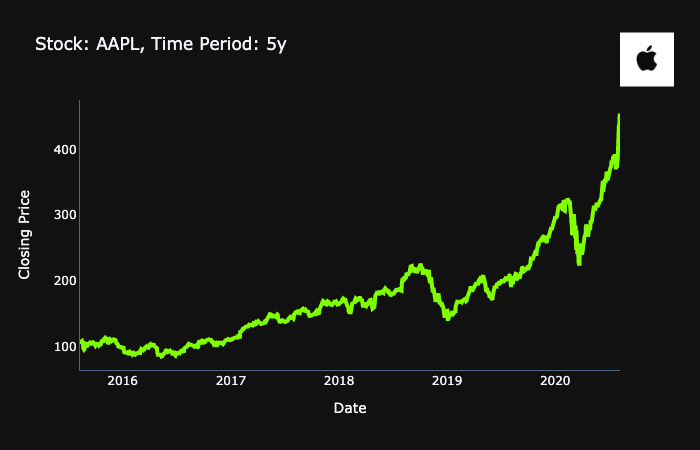

In [15]:
aapl = yf.Ticker("AAPL")
stock_chart(aapl, '5y', kind='static')

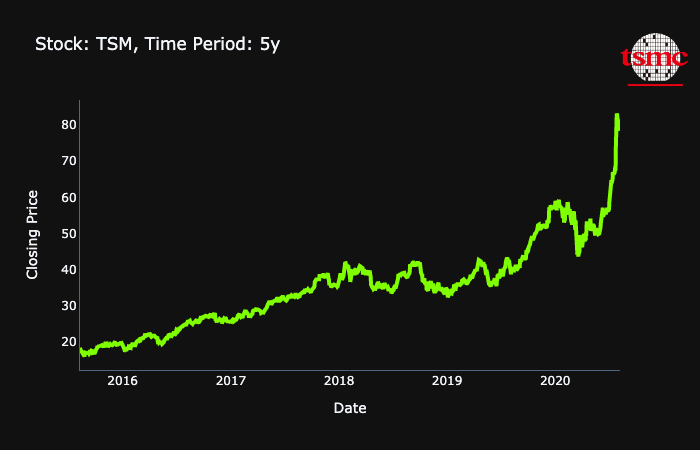

In [16]:
stock_chart(yf.Ticker("TSM"), '5y', kind='static')

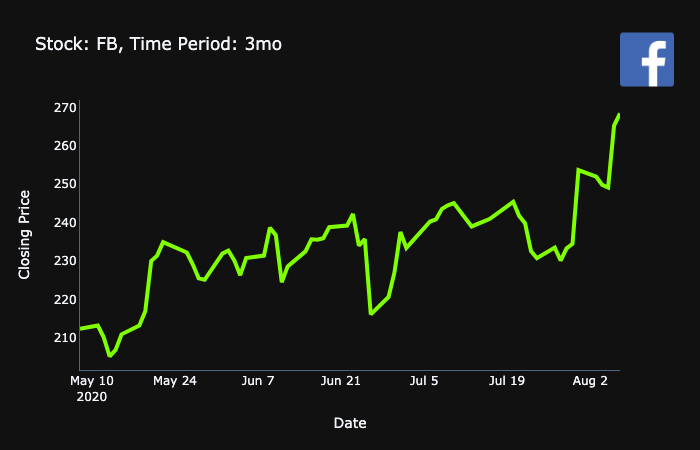

In [17]:
stock_chart(yf.Ticker("FB"), '3mo', kind='static')